In [70]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report

warnings.filterwarnings('ignore')

In [14]:
features = pd.read_csv('spx_cons_norm.csv')
features = features[['tic','datadate','industry_id','multi_class','ROE','Asset Turnover','MA12','Size','PB','ev_ebitda']]
# industry_dummy = pd.get_dummies(features['industry_id'])
# features = pd.merge(features,industry_dummy,how='left',left_index=True,right_index=True)

features = features.dropna(subset=['multi_class'])
features_after = features.groupby(['tic']).ffill()
features_after = pd.merge(features_after,features[['tic']],how='left',left_index=True,right_index=True)

cols = [col for col in features_after.columns if col not in ['datadate','industry_id','forward_excess_ret','tic']]
df_na = features_after.isnull()

df_mean = features_after.groupby('tic').mean()

for col in cols:
    na_series = features_after[col].isnull()
    names = list(features_after.loc[na_series,'tic'])     

    t = df_mean.loc[names,col]
    t.index = features_after.loc[na_series,col].index

    
    features_after.loc[na_series,col] = t

for col in cols:
    na_series = features_after[col].isnull()
    mean = np.mean(features_after[col]) 
    features_after.loc[na_series,col] = mean

In [16]:
X = features_after[['ROE','Asset Turnover','MA12','Size','PB','ev_ebitda']]
#X = sm.add_constant(X)
Y = features_after[['multi_class']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=52)

# Logistic

In [25]:
reg = LogisticRegressionCV(Cs=np.linspace(0.00001,0.001,100),cv=5,fit_intercept=False,penalty='l2',multi_class='multinomial').fit(X_train,y_train)   
#print(reg.coef_)
print(reg.scores_)

{0.0: array([[0.11439794, 0.11476617, 0.11501166, 0.11513441, 0.11488892,
        0.11513441, 0.11501166, 0.11525715, 0.11525715, 0.11488892,
        0.11537989, 0.11574813, 0.11623911, 0.11599362, 0.11599362,
        0.11587087, 0.11562538, 0.11574813, 0.11525715, 0.11513441,
        0.11476617, 0.11464343, 0.11464343, 0.11464343, 0.11488892,
        0.11476617, 0.11464343, 0.11488892, 0.11464343, 0.11452068,
        0.11427519, 0.11427519, 0.11439794, 0.11415245, 0.11390696,
        0.11390696, 0.11390696, 0.1140297 , 0.11415245, 0.1140297 ,
        0.11378422, 0.11378422, 0.11390696, 0.11390696, 0.11366147,
        0.11390696, 0.11427519, 0.11439794, 0.11476617, 0.11476617,
        0.11452068, 0.11464343, 0.11476617, 0.11439794, 0.11427519,
        0.11439794, 0.11439794, 0.11439794, 0.11452068, 0.11427519,
        0.11415245, 0.11427519, 0.11427519, 0.11427519, 0.11415245,
        0.11415245, 0.1140297 , 0.11378422, 0.11366147, 0.11341598,
        0.11329324, 0.11329324, 0.11317049

In [30]:
print(reg.C_)

[0.00013 0.00013 0.00013 0.00013 0.00013 0.00013 0.00013 0.00013 0.00013
 0.00013]


In [33]:
reg = LogisticRegression(C=0.00013,multi_class='multinomial',penalty='l2',fit_intercept=False)
reg.fit(X_train,y_train)
logistic_predict=reg.predict(X_test)

In [57]:
logistic_df.loc[0,1]

13

In [56]:
logistic_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9],index = [0,1,2,3,4,5,6,7,8,9])
logistic_df = logistic_df.replace(np.nan,0)
for i in range(len(y_test)):
    logistic_df.loc[np.array(y_test)[i],logistic_predict[i]] += 1
logistic_df

,0,1,2,3,4,5,6,7,8,9
0,490,13,35,82,397,132,20,0,27,574
1,391,17,30,95,514,128,13,0,37,523
2,393,15,40,95,551,116,16,0,34,537
3,335,6,35,77,577,133,19,0,29,519
4,332,16,37,86,552,139,15,0,24,503
5,315,13,33,74,557,139,9,0,44,513
6,335,11,36,73,550,151,13,0,40,549
7,338,12,26,86,583,129,18,1,43,520
8,386,8,33,87,520,137,22,0,40,533
9,473,8,29,57,402,141,15,0,43,563


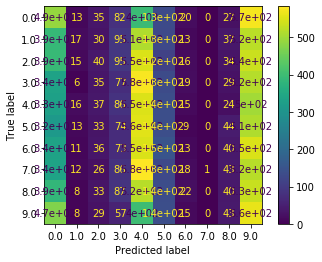

In [41]:
plot_confusion_matrix(reg,X_test,y_test)

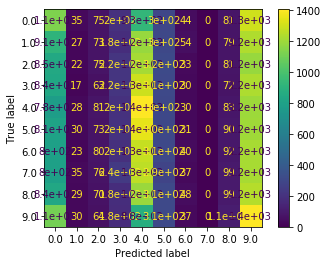

In [58]:
plot_confusion_matrix(reg,X_train,y_train)

In [47]:
print(classification_report(y_test, logistic_predict))

              precision    recall  f1-score   support

         0.0       0.13      0.28      0.18      1770
         1.0       0.14      0.01      0.02      1748
         2.0       0.12      0.02      0.04      1797
         3.0       0.09      0.04      0.06      1730
         4.0       0.11      0.32      0.16      1704
         5.0       0.10      0.08      0.09      1697
         6.0       0.08      0.01      0.01      1758
         7.0       1.00      0.00      0.00      1756
         8.0       0.11      0.02      0.04      1766
         9.0       0.11      0.33      0.16      1731

    accuracy                           0.11     17457
   macro avg       0.20      0.11      0.08     17457
weighted avg       0.20      0.11      0.08     17457



# KNN

In [63]:
for n in [10,50,100,200,400,600,800,900,1000]:
    neigh = KNeighborsClassifier(n_neighbors=n)
    #neigh.fit(X_train,y_train)
    scores = cross_val_score(neigh, X_train,y_train, cv=5)
    print(n,np.mean(scores))

10 0.1110893102800972
50 0.11317610355820322
100 0.1140352492385271
200 0.11651484321769659
400 0.11533642303281186
600 0.1161957193939221
800 0.11734950025662445
900 0.11830694405472533
1000 0.11607285126712445


In [64]:
neigh = KNeighborsClassifier(n_neighbors=900)
knn_predict = neigh.fit(X_train,y_train).predict(X_test)

In [69]:
knn_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9],index = [0,1,2,3,4,5,6,7,8,9])
knn_df = knn_df.replace(np.nan,0)
for i in range(len(y_test)):
    knn_df.loc[np.array(y_test)[i],knn_predict[i]] += 1
knn_df

,0,1,2,3,4,5,6,7,8,9
0,335,110,67,140,294,180,108,127,96,313
1,215,122,68,151,350,247,107,146,81,261
2,219,109,88,148,360,268,104,171,94,236
3,196,89,65,197,374,268,108,133,98,202
4,150,102,83,169,394,247,113,164,82,200
5,175,97,73,142,350,286,130,169,88,187
6,192,86,67,174,360,288,140,143,88,220
7,191,91,79,169,363,269,125,155,99,215
8,234,85,65,169,383,241,126,135,87,241
9,353,103,71,116,292,163,118,115,83,317


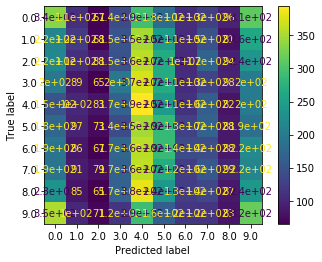

In [66]:
plot_confusion_matrix(neigh,X_test,y_test)

In [68]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

         0.0       0.15      0.19      0.17      1770
         1.0       0.12      0.07      0.09      1748
         2.0       0.12      0.05      0.07      1797
         3.0       0.13      0.11      0.12      1730
         4.0       0.11      0.23      0.15      1704
         5.0       0.12      0.17      0.14      1697
         6.0       0.12      0.08      0.10      1758
         7.0       0.11      0.09      0.10      1756
         8.0       0.10      0.05      0.07      1766
         9.0       0.13      0.18      0.15      1731

    accuracy                           0.12     17457
   macro avg       0.12      0.12      0.11     17457
weighted avg       0.12      0.12      0.11     17457



# random forest

In [72]:
for max_depth in [2,3,4,5,6,7,10,15,20]:
    regr = RandomForestClassifier(max_depth=max_depth, random_state=0)
    scores = cross_val_score(regr, X_train,y_train, cv=5)
    print(max_depth,np.mean(scores))

2 0.11688314925013255
3 0.1188961752424778
4 0.11860158827795095
5 0.11938715351668913
6 0.11838061490478284
7 0.11987820110406222
10 0.12110567993936365
15 0.11860156718264088
20 0.11734959970594343


In [73]:
regr = RandomForestClassifier(max_depth=10, random_state=0)
fm_predict = regr.fit(X_train,y_train).predict(X_test)

In [74]:
rm_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9],index = [0,1,2,3,4,5,6,7,8,9])
rm_df = rm_df.replace(np.nan,0)
for i in range(len(y_test)):
    rm_df.loc[np.array(y_test)[i],fm_predict[i]] += 1
rm_df

,0,1,2,3,4,5,6,7,8,9
0,373,82,60,95,332,178,79,66,77,428
1,209,97,57,120,447,197,95,84,79,363
2,204,68,51,131,460,243,123,91,82,344
3,189,65,45,125,485,226,116,85,88,306
4,143,86,53,125,493,241,113,96,76,278
5,161,84,39,117,467,267,97,92,66,307
6,184,85,47,119,480,248,109,90,79,317
7,175,79,52,120,493,249,118,88,70,312
8,225,65,32,119,477,225,117,89,66,351
9,320,73,55,91,323,149,73,83,91,473


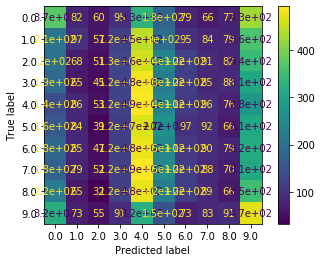

In [75]:
plot_confusion_matrix(regr,X_test,y_test)

In [77]:
print(classification_report(y_test, fm_predict))

              precision    recall  f1-score   support

         0.0       0.17      0.21      0.19      1770
         1.0       0.12      0.06      0.08      1748
         2.0       0.10      0.03      0.04      1797
         3.0       0.11      0.07      0.09      1730
         4.0       0.11      0.29      0.16      1704
         5.0       0.12      0.16      0.14      1697
         6.0       0.10      0.06      0.08      1758
         7.0       0.10      0.05      0.07      1756
         8.0       0.09      0.04      0.05      1766
         9.0       0.14      0.27      0.18      1731

    accuracy                           0.12     17457
   macro avg       0.12      0.12      0.11     17457
weighted avg       0.12      0.12      0.11     17457

